# Processing social distancing tweets

In [20]:
import datetime
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATADIR = "/home/erikt/projects/puregome/data/distance/"

## Frequencies

In [5]:
FILEPATTERN = "20200[2-6]"
DATEPATTERN = "%Y%m%d"
NBROFCHARSINDATE = 8

In [6]:
inFileNames = sorted(os.listdir(DATADIR))
frequencies = {}
for inFileName in inFileNames:
    if re.search(FILEPATTERN,inFileName):
        df = pd.read_csv(DATADIR+inFileName,compression="gzip")
        date = inFileName[:NBROFCHARSINDATE]
        if not date in frequencies: frequencies[date] = 0
        frequencies[date] += len(df)

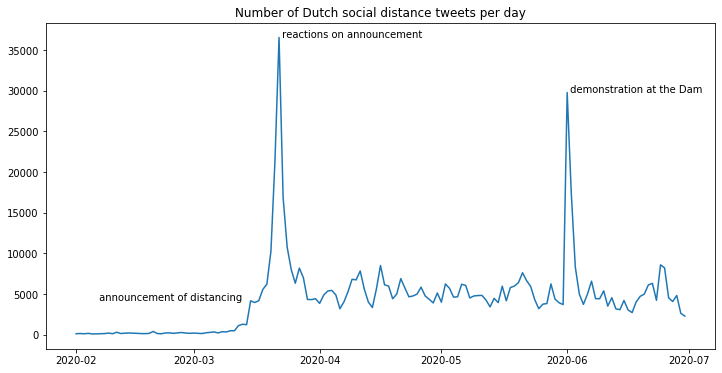

In [71]:
PEAK1 = "20200322"
PEAK1TEXT = " reactions on announcement"
PEAK2 = "20200601"
PEAK2TEXT = " demonstration at the Dam"
PEAK3 = "20200315"
PEAK3OFFSET = "20200206"
PEAK3TEXT = " announcement of distancing"

def string2date(dateString,datePattern=DATEPATTERN):
    return(datetime.datetime.strptime(dateString,datePattern))

plt.figure(figsize=(12,6))
ax1 = plt.subplot(111)
ax1.plot_date([string2date(d) for d in frequencies],\
              [frequencies[d] for d in frequencies],xdate=True,fmt="-",label="label")
plt.annotate(PEAK1TEXT,(string2date(PEAK1),frequencies[PEAK1]))
plt.annotate(PEAK2TEXT,(string2date(PEAK2),frequencies[PEAK2]))
plt.annotate(PEAK3TEXT,(string2date(PEAK3OFFSET),frequencies[PEAK3]))
plt.title("Number of Dutch social distance tweets per day")
plt.show()

In [15]:
[(d,frequencies[d]) for d in sorted(frequencies.keys(),key=lambda d:frequencies[d],reverse=True)][0:5]

[('20200322', 36538),
 ('20200601', 29775),
 ('20200321', 21488),
 ('20200602', 17530),
 ('20200323', 16900)]

## Vocabulary comparison

In [33]:
import math
import sys
from IPython.display import clear_output
from nltk.tokenize import TweetTokenizer
sys.path.append("/home/erikt/projects/newsgac/fasttext-runs")
import tscore

In [25]:
ID = "id_str"
TEXT = "text"

In [18]:
def squeal(text=None):
    clear_output(wait=True)
    if not text is None: print(text)

In [16]:
def getTokens(filePattern,dataDir=DATADIR):
    fileList = sorted(os.listdir(dataDir))
    tokens = {}
    for inFileName in fileList:
        if re.search(filePattern,inFileName):
            squeal(inFileName)
            df = pd.read_csv(DATADIR+inFileName,compression="gzip",index_col=ID)
            for i in range(0,len(df)):
                text = df.iloc[i][TEXT]
                for token in TweetTokenizer().tokenize(text.lower()): 
                    if not token in tokens: tokens[token] = 0
                    tokens[token] += 1
    return(tokens)

In [31]:
NBROFTOKENS = "totalFreq"
NBROFTYPES = "nbrOfWords"
WORDFREQS = "wordFreqs"

def makeTscoreData(tokenList):
    data = { NBROFTOKENS:0, NBROFTYPES:0, WORDFREQS:{} }
    for token in tokenList:
        if not math.isnan(tokenList[token]):
            data[WORDFREQS][token] = tokenList[token]
            data[NBROFTYPES] += 1
            data[NBROFTOKENS] += tokenList[token]
    return(data)

def sortTscores(tscores):
    return({token:tscores[token] for token in sorted(tscores.keys(),key=lambda t:tscores[t],reverse=True)})

In [35]:
NBROFEXAMPLES = 20

def dictTopN(dictionary,n=NBROFEXAMPLES):
    return([(x[1],x[0]) for x in dictionary.items()][0:n])

In [72]:
tokens1 = getTokens(PEAK1)
tokens2 = getTokens(PEAK2)

20200601-23.out.gz


In [73]:
tscoresData1 = makeTscoreData(tokens1)
tscoresData2 = makeTscoreData(tokens2)
for x in dictTopN(sortTscores(tscore.computeTscore(tscoresData1,tscoresData2)),n=10): 
    print(round(x[0],1),x[1])

93.9 thuis
83.8 blijf
73.7 houd
72.9 afstand
72.2 :
60.3 het
58.5 #coronavirus
57.4 #houdafstand
54.0 instructies
52.9 of


In [74]:
for x in dictTopN(sortTscores(tscore.computeTscore(tscoresData2,tscoresData1)),n=10): 
    print(round(x[0],1),x[1])

75.2 #halsema
71.2 de
70.9 dam
68.0 1.5
67.6 ben
67.2 demonstratie
58.3 halsema
58.2 boete
55.7 #amsterdam
53.6 boven
